In [13]:
#Pretty Display of Variables
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [14]:
#%autoreload

# Import libraries

In [15]:
from plot_projections import *
from prop_info import *
from get_segments import blade_alone, get_segments_points, get_planes
from major_axis import get_major_axis
#from projections import couple_all_planes, project_all_couples, projections_by_side, project_couple
from new_projections import get_all_points_for_projections, projection_one_plane
from parameters import get_hub_points, get_hub_radius
from plot_param import plot_hub
from plot_prop import plot_pointcloud, plot_direction, plot_segments
from myMathFunction import least_squares, point_on_plane
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

# Pre-processing

In [47]:
propeller_coords = pd.read_csv('propeller_data.csv')
propeller_coords.shape

(38940, 3)

In [48]:
propeller_coords = propeller_coords.drop_duplicates(subset=None, keep='first', inplace=False)
propeller_coords = propeller_coords.reset_index(drop=True)

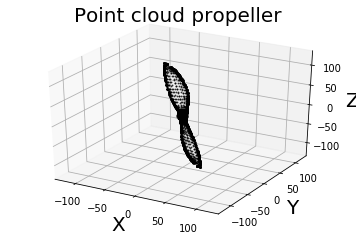

In [49]:
propeller_coords = center_prop(propeller_coords)
plot_pointcloud(propeller_coords)

In [50]:
_, _, _, highest_point, _ = extreme_points(propeller_coords)
print(highest_point)

[ -24.68413515   -0.48328526  123.19767838]


In [51]:
rotation_point = highest_point.copy()
rotation_point[2] = 0
print(rotation_point)

[-24.68413515  -0.48328526   0.        ]


In [52]:
theta =  np.arccos( (rotation_point @ [0,1,0]) / (np.linalg.norm(rotation_point) * np.linalg.norm([0,1,0]))) #* 180/np.pi
print(theta)

1.59037260584


In [53]:
np.cos(theta)

-0.019575028696258594

In [54]:
ct, st = np.cos(theta), np.sin(theta)
rotz = np.array(((ct,-st, 0), (st, ct, 0), (0,0,1)))
print(rotz)

[[-0.01957503 -0.99980839  0.        ]
 [ 0.99980839 -0.01957503  0.        ]
 [ 0.          0.          1.        ]]


In [55]:
first_proj = propeller_coords.apply(lambda x: rotz @ x.values, axis = 1)
a = propeller_coords - first_proj
print(a)

             X         Y    Z
0    -0.890524  0.203272  0.0
1     1.066906  1.083790  0.0
2    -0.332826 -0.343614  0.0
3     1.624605  0.536904  0.0
4     0.224873 -0.890501  0.0
5     2.165361  0.006631  0.0
6     0.765630 -1.420774  0.0
7     2.672737 -0.490909  0.0
8     1.273006 -1.918313  0.0
9     3.131321 -0.940602  0.0
10    1.731590 -2.368007  0.0
11    3.527181 -1.328787  0.0
12    2.127450 -2.756192  0.0
13    3.848288 -1.643669  0.0
14    2.448556 -3.071073  0.0
15    4.084882 -1.875676  0.0
16    2.685151 -3.303081  0.0
17    4.229777 -2.017761  0.0
18    2.830045 -3.445166  0.0
19    4.278569 -2.065608  0.0
20    2.878837 -3.493012  0.0
21    4.229777 -2.017761  0.0
22    2.830045 -3.445166  0.0
23    4.084882 -1.875676  0.0
24    2.685151 -3.303081  0.0
25    3.848288 -1.643669  0.0
26    2.448556 -3.071073  0.0
27    3.527181 -1.328787  0.0
28    2.127450 -2.756192  0.0
29    3.131321 -0.940602  0.0
...        ...       ...  ...
6460  1.706325 -2.343231  0.0
6461  2.28

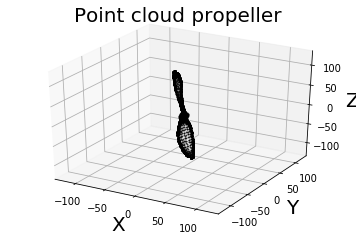

In [56]:
plot_pointcloud(first_proj)

In [57]:
rot_proj = rotz @ highest_point
print(rot_proj)

[   0.96638531  -24.66994511  123.19767838]


In [58]:
phi =  - np.arccos( (rot_proj @ [0,0,1]) / (np.linalg.norm(rot_proj) * np.linalg.norm([0,0,1]))) #* 180/np.pi

In [59]:
print(phi)

-0.197780543725


In [60]:
cp, sp = np.cos(phi), np.sin(phi)
rotx = np.array(((1, 0, 0), (0, cp, -sp), (0,sp,cp)))

In [61]:
rotx

array([[ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.9805051 ,  0.19649363],
       [ 0.        , -0.19649363,  0.9805051 ]])

In [62]:
propeller_coords = propeller_coords.apply(lambda x: rotx @ rotz @ x.values, axis = 1)

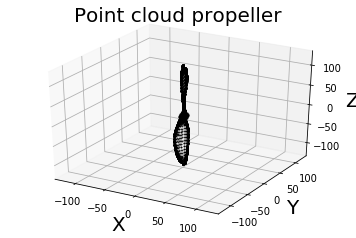

In [63]:
plot_pointcloud(propeller_coords)

In [6]:
max_point, min_point, middle_point, highest_point, lowest_point = extreme_points(propeller_coords)

vect_length = vect_blade(max_point, min_point) 

dmiddle, dhighest, dlowest = d_blade(vect_length, middle_point, highest_point, lowest_point)

upper_blade, lower_blade = blade_alone(propeller_coords, vect_length, dmiddle)

vect_out, vect_side, hub_inner_radius = get_major_axis(propeller_coords, middle_point, vect_length)

# Projections

In [7]:
nb_seg = 3
resolution = 3
nb_points = 100

planes = get_planes(upper_blade, dmiddle, dhighest, vect_length, nb_seg)
segments = get_segments_points(upper_blade, planes, nb_seg)
#plot_segments(segments)

up, down = get_all_points_for_projections(planes, segments, nb_seg, resolution)

In [8]:
up1 = up[0]
dn1 = down[0]
plan1 = planes[0]
#print(up1.shape)

In [9]:
popt_right, popt_left, right_projection_points, left_projection_points = projection_one_plane(up1, dn1, plan1, nb_points)

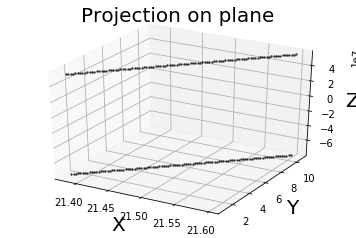

In [12]:
plot_projection_up_down(right_projection_points, left_projection_points)

# Find parameters

    - Tip radius 
        Projection dans le sens de la longueur et ... ??
    - Blade twist 
        Project on planes as in projection
        Compute difference of angle between main directions of projections (PCA possible)

### Hub radius

In [ ]:
hub_points = get_hub_points(propeller_coords, dmiddle, vect_length)

hub_outer_radius, hub_inner_radius = get_hub_radius(hub_points, middle_point, vect_side)

hub_radius = hub_outer_radius[2] - middle_point[2]  #from center to exterior radius

In [ ]:
plot_hub(propeller_coords, hub_points, hub_outer_radius, hub_inner_radius)

### Chord length

In [ ]:
chord_length = np.linalg.norm(highest_point - middle_point)
chord_length

### Blade twist

### Tip radius